In [ ]:
# NetworkX is a Python package for the creation, manipulation,
# and study of the structure, dynamics, and functions of complex networks.

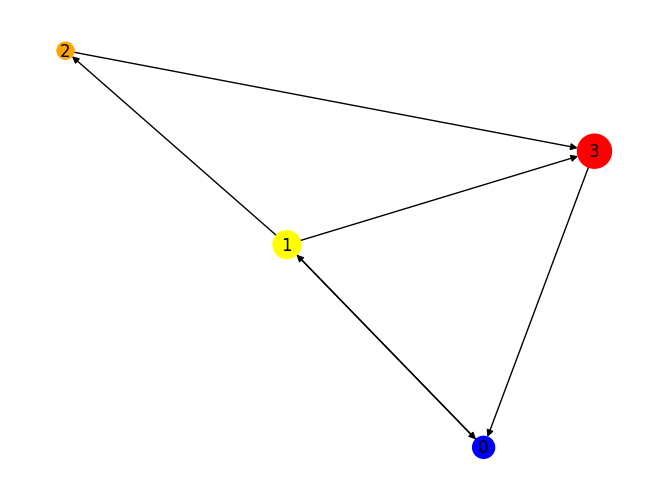

In [3]:
import networkx as nx 
H = nx.DiGraph()

#adding nodes
H.add_nodes_from([
  (0, {"color": "blue", "size": 250}),

  (1, {"color": "yellow", "size": 400}),

  (2, {"color": "orange", "size": 150}),

  (3, {"color": "red", "size": 600})


])

#adding edges
H.add_edges_from([
  (0, 1),

  (1, 2),

  (1, 0),

  (1, 3),

  (2, 3),

  (3,0)


])

node_colors = nx.get_node_attributes(H, "color").values()
colors = list(node_colors)
node_sizes = nx.get_node_attributes(H, "size").values()
sizes = list(node_sizes)

#Plotting Graph
nx.draw(H, with_labels=True, node_color=colors, node_size=sizes)

In [ ]:
#Graph embedding refers to the process of representing graph data in a 
#lower-dimensional vector space while preserving the structural information 
#and properties of the graph. It aims to transform the complex and interconnected
#graph structure into a continuous vector representation that can be used as input for machine learning algorithms.

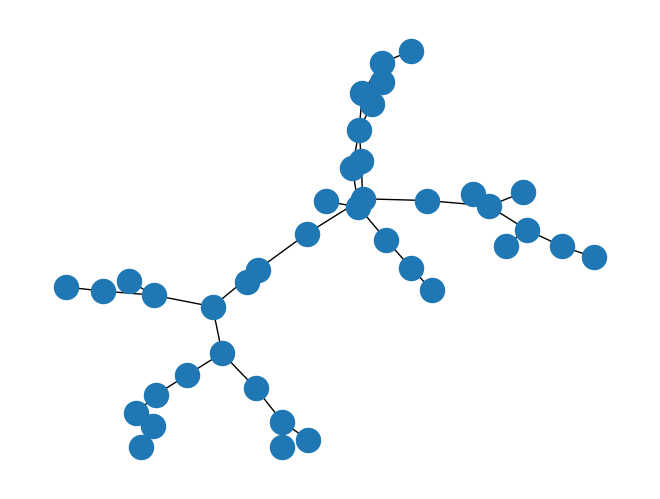

Computing transition probabilities:   0%|          | 0/40 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|████████████████████████████████████████████████████| 200/200 [00:00<00:00, 527.73it/s]


[0.3405766 3.8566182]
[-0.3179204  1.1425716]
[-5.441337    0.47608596]
[0.56380403 5.313333  ]
[-1.6834965   0.45321342]
[0.04772787 2.3766003 ]
[-1.0340343   0.48005977]
[-0.27220267  1.0454918 ]
[-1.6915193   0.37659383]
[-2.924743  0.333707]
[0.32532388 4.1535387 ]
[-5.369797    0.46573266]
[-1.7044579   0.42885306]
[0.6252691 5.8899174]
[-0.47569075  0.959381  ]
[-4.9919176   0.44893086]
[0.16487677 3.1049566 ]
[-0.40277314  1.061195  ]
[-4.462268    0.42079294]
[-3.9127884   0.38833174]
[-0.41595644  1.0301389 ]
[-0.1442191  1.5734636]
[-0.28022268  1.1408852 ]
[0.01843896 1.8632188 ]
[-3.6578624   0.37818494]
[-0.6199509  0.6298236]
[-5.149985    0.43620765]
[-1.728988    0.44800448]
[0.34761462 4.280742  ]
[0.59573895 5.557598  ]
[-0.48200127  0.94941056]
[-0.37384358  1.0730814 ]
[-5.0871916   0.43390074]
[0.53700596 5.011422  ]
[-4.9403696   0.41858867]
[-1.6268564   0.43313065]
[0.3523887 3.6891737]
[0.32775456 3.5777886 ]
[0.03492023 2.3495364 ]
[-1.0212159  0.4985812]


In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from node2vec import Node2Vec

G = nx.random_tree(40)

nx.draw_spring(G)
plt.show()

# Create a Node2Vec object
node2vec = Node2Vec(G, dimensions=2, walk_length=10, num_walks=200, p=1, q=1)

# Embed nodes
model = node2vec.fit(window=10, min_count=1)

# Get the embeddings for all nodes
embeddings = {}
for node in G.nodes():
    embeddings[node] = model.wv[node]

# Print the embedding of a specific nodef
for i in range(len(embeddings)):
    print(embeddings[i])


Computing transition probabilities:   0%|          | 0/40 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|████████████████████████████████████████████████████| 200/200 [00:01<00:00, 194.02it/s]


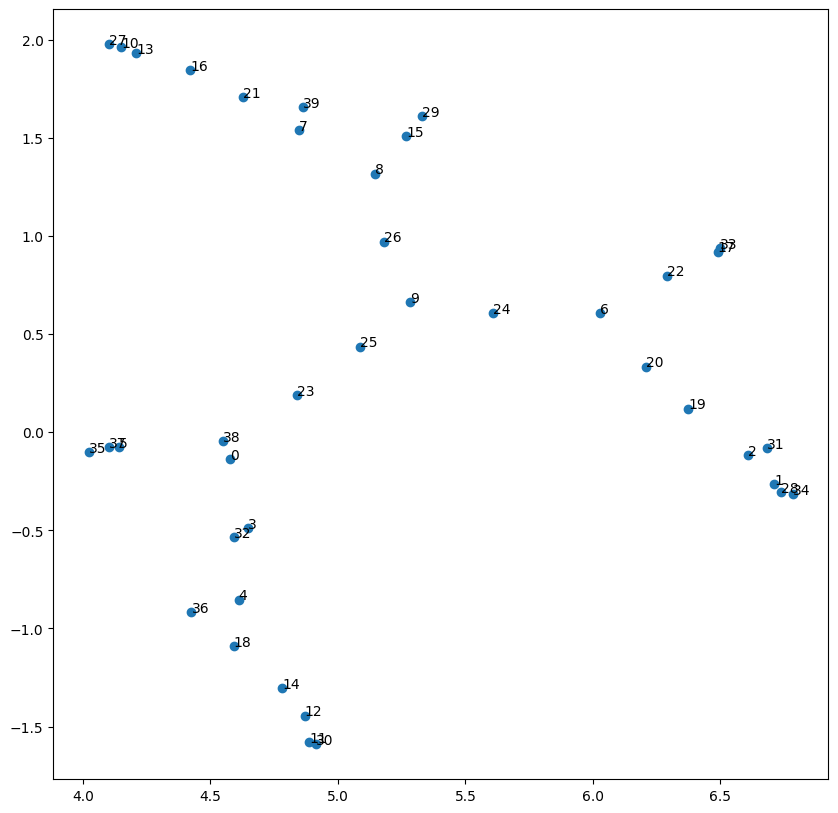

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from node2vec import Node2Vec
from sklearn.manifold import TSNE
import numpy as np

# Create or load the graph
G = nx.random_tree(40)

# Create a Node2Vec object and fit the model
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200)
model = node2vec.fit(window=10, min_count=1)

# Get the embeddings for all nodes
embeddings = {}
for node in G.nodes():
    embeddings[node] = model.wv[node]

# Perform dimensionality reduction with t-SNE
tsne = TSNE(n_components=2)
embeddings_2d = tsne.fit_transform(np.array(list(embeddings.values())))

# Visualize the embeddings
plt.figure(figsize=(10, 10))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

# Annotate the points with node labels
for i, node in enumerate(embeddings.keys()):
    plt.annotate(node, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.show()



In [11]:
%%capture
import os
import torch
os.environ['TORCH'] = torch.__version__
os.environ['PYTHONWARNINGS'] = "ignore"
!pip install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git
    

Looking in links: https://data.pyg.org/whl/torch-${TORCH}.html
  Using cached torch_scatter-2.1.1.tar.gz (107 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [21 lines of output]
  Traceback (most recent call last):
    File "C:\Users\kfard\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\kfard\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\kfard\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
      return hook(config_settings)
             ^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\kfard\AppData\Local\Temp\pip-build-env-t3wkocfd\overlay\Lib\site-packages\setuptools\build_me

Looking in links: https://data.pyg.org/whl/torch-${TORCH}.html
  Using cached torch_sparse-0.6.17.tar.gz (209 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [21 lines of output]
  Traceback (most recent call last):
    File "C:\Users\kfard\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\kfard\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\kfard\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
      return hook(config_settings)
             ^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\kfard\AppData\Local\Temp\pip-build-env-e3fmwbfa\overlay\Lib\site-packages\setuptools\build_me

  Cloning https://github.com/pyg-team/pytorch_geometric.git to c:\users\kfard\appdata\local\temp\pip-req-build-z8l6b56k


  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git version
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [12]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())

print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.
print(data)

Processing...
Done!


Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7
Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
